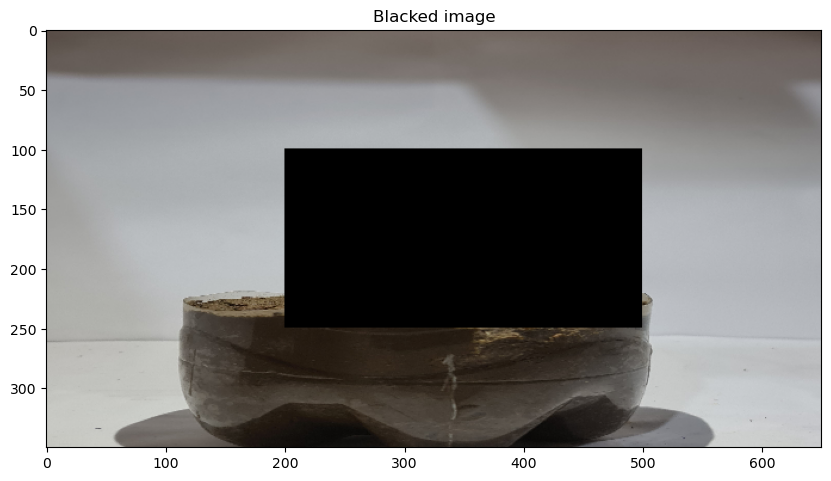

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('20250321_124006.jpg')
resized_image = cv2.resize(image, (650, 350))

x1, x2 = 200, 500 
y1, y2 = 100, 250  
resized_image[y1:y2, x1:x2] = (0, 0, 0)  # BGR

plt.figure(figsize=(10, 6))
plt.title("Blacked image")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)) 
plt.show()


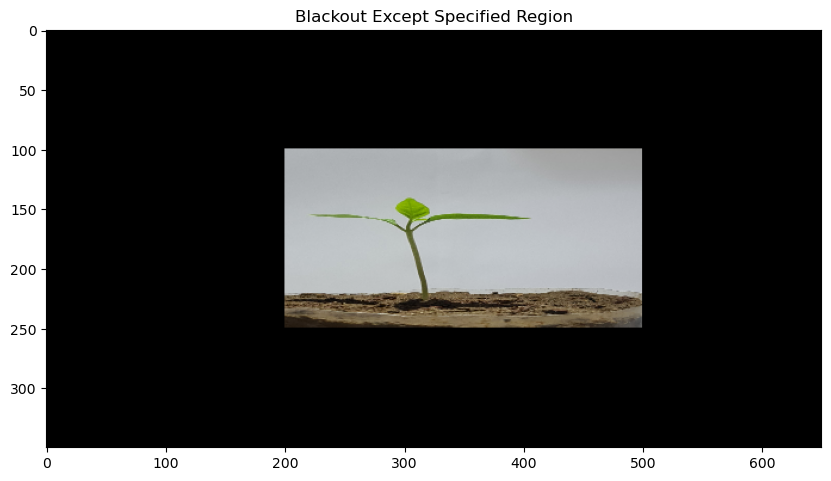

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('20250321_124006.jpg')
resized_image = cv2.resize(image, (650, 350))

# region to keep
x_start, x_end = 200, 500  
y_start, y_end = 100, 250  

# black mask same size as the image
black_background = np.zeros_like(resized_image)

# copy only specified region to black mask
black_background[y_start:y_end, x_start:x_end] = resized_image[y_start:y_end, x_start:x_end]

# result
plt.figure(figsize=(10, 6))
plt.title("Blackout Except Specified Region")
plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.show()




In [ ]:
# trackbars for find HSV ranges

In [28]:
import cv2
import numpy as np

def nothing(x):
    pass

# imagecreate trackbars for HSV ranges
frame = cv2.imread('20250321_124006.jpg') 
frame = cv2.resize(frame, (650, 350))

# create window
cv2.namedWindow("Trackbars")

# trackbars for HSV ranges
cv2.createTrackbar("L - H", "Trackbars", 0, 179, nothing)  #  Hue
cv2.createTrackbar("L - S", "Trackbars", 0, 255, nothing)  #  Saturation
cv2.createTrackbar("L - V", "Trackbars", 0, 255, nothing)  #  Value
cv2.createTrackbar("U - H", "Trackbars", 179, 179, nothing)  
cv2.createTrackbar("U - S", "Trackbars", 255, 255, nothing) 
cv2.createTrackbar("U - V", "Trackbars", 255, 255, nothing)  

while True:
    # image to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    #  current positions of trackbars
    l_h = cv2.getTrackbarPos("L - H", "Trackbars")
    l_s = cv2.getTrackbarPos("L - S", "Trackbars")
    l_v = cv2.getTrackbarPos("L - V", "Trackbars")
    u_h = cv2.getTrackbarPos("U - H", "Trackbars")
    u_s = cv2.getTrackbarPos("U - S", "Trackbars")
    u_v = cv2.getTrackbarPos("U - V", "Trackbars")

    # Define lower and upper bounds for the HSV mask
    lower_color = np.array([l_h, l_s, l_v])
    upper_color = np.array([u_h, u_s, u_v])

    # Create a mask with the specified bounds
    mask = cv2.inRange(hsv, lower_color, upper_color)

    # Apply the mask to the original image
    result = cv2.bitwise_and(frame, frame, mask=mask)

    # Display the result
    cv2.imshow("Original", frame)
    cv2.imshow("Mask", mask)
    cv2.imshow("Result", result)

    # Break the loop on pressing 'ESC' key
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # ASCII for ESC
        break

# Clean up
cv2.destroyAllWindows()


In [ ]:
#day14

Plant Height (in pixels): 78


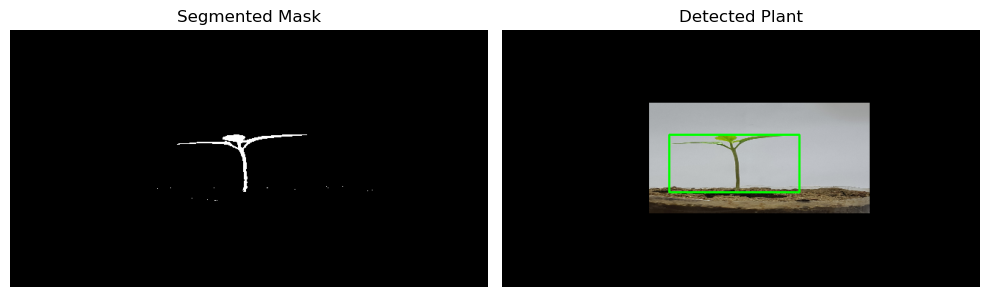

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize the new image
image = cv2.imread('20250321_062944.jpg')
resized_image = cv2.resize(image, (650, 350))

# Define region of interest 
x_start, x_end = 200, 500
y_start, y_end = 100, 250

# Create a black background and copy ROI
black_background = np.zeros_like(resized_image)
black_background[y_start:y_end, x_start:x_end] = resized_image[y_start:y_end, x_start:x_end]

# Convert to HSV
hsv = cv2.cvtColor(black_background, cv2.COLOR_BGR2HSV)

# previous HSV values
lower_green = np.array([28, 16, 0])
upper_green = np.array([179, 255, 255])

# Creating mask
mask = cv2.inRange(hsv, lower_green, upper_green)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    print("No plant detected. Plant Height = 0 pixels.")
else:
    # largest contour
    plant_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(plant_contour)

    # Draw bounding box
    cv2.rectangle(black_background, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Output plant height
    print(f"Plant Height (in pixels): {h}")

    # Display results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Segmented Mask")
    plt.imshow(mask, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Detected Plant")
    plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
#day13

Plant Height (in pixels): 76


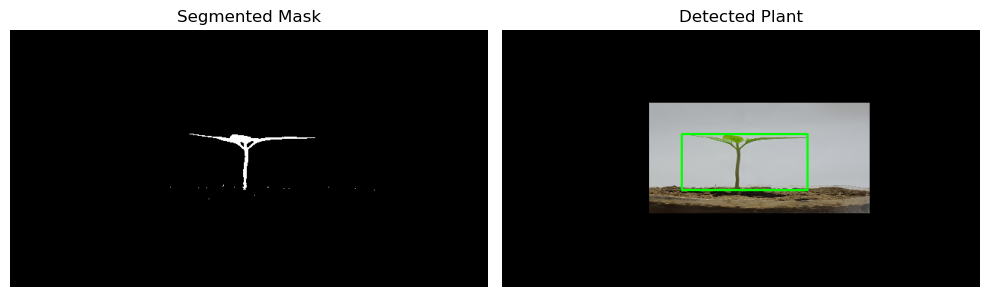

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize the new image
image = cv2.imread('20250320_064506.jpg')
resized_image = cv2.resize(image, (650, 350))

# Define region of interest (same coordinates as before)
x_start, x_end = 200, 500
y_start, y_end = 100, 250

# Create a black background and copy ROI
black_background = np.zeros_like(resized_image)
black_background[y_start:y_end, x_start:x_end] = resized_image[y_start:y_end, x_start:x_end]

# Convert to HSV
hsv = cv2.cvtColor(black_background, cv2.COLOR_BGR2HSV)

# Use previously tuned HSV values
lower_green = np.array([28, 16, 0])
upper_green = np.array([179, 255, 255])

# Create mask
mask = cv2.inRange(hsv, lower_green, upper_green)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    print("No plant detected. Plant Height = 0 pixels.")
else:
    # largest contour
    plant_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(plant_contour)

    # Draw bounding box
    cv2.rectangle(black_background, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Output plant height
    print(f"Plant Height (in pixels): {h}")

    # Display results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Segmented Mask")
    plt.imshow(mask, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Detected Plant")
    plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
#day12

Plant Height (in pixels): 80


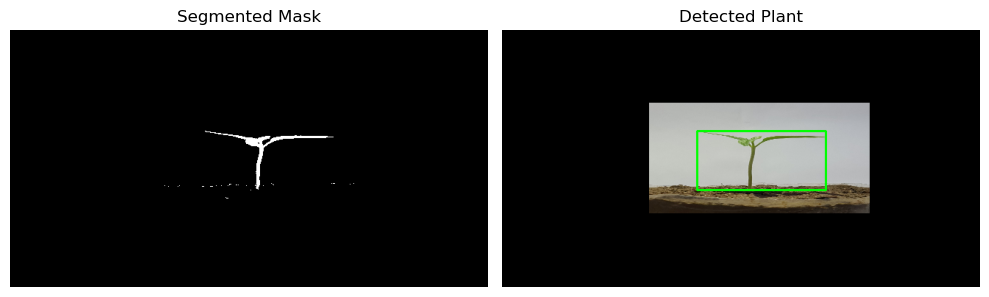

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize the new image
image = cv2.imread('20250319_191814.jpg')
resized_image = cv2.resize(image, (650, 350))

# Define region of interest (same coordinates as before)
x_start, x_end = 200, 500
y_start, y_end = 100, 250

# Create a black background and copy ROI
black_background = np.zeros_like(resized_image)
black_background[y_start:y_end, x_start:x_end] = resized_image[y_start:y_end, x_start:x_end]

# Convert to HSV
hsv = cv2.cvtColor(black_background, cv2.COLOR_BGR2HSV)

# Use previously tuned HSV values
lower_green = np.array([28, 16, 0])
upper_green = np.array([179, 255, 255])

# Create mask
mask = cv2.inRange(hsv, lower_green, upper_green)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    print("No plant detected. Plant Height = 0 pixels.")
else:
    # largest contour
    plant_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(plant_contour)

    # Draw bounding box
    cv2.rectangle(black_background, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Output plant height
    print(f"Plant Height (in pixels): {h}")

    # Display results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Segmented Mask")
    plt.imshow(mask, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Detected Plant")
    plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
#day11

Plant Height (in pixels): 81


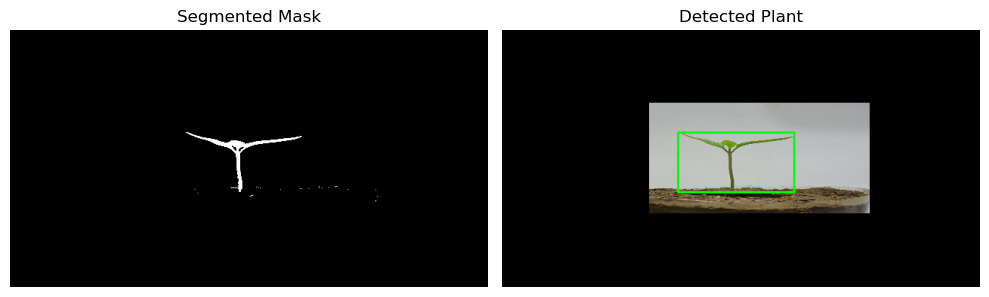

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize the new image
image = cv2.imread('20250318_181554.jpg')
resized_image = cv2.resize(image, (650, 350))

# Define region of interest (same coordinates as before)
x_start, x_end = 200, 500
y_start, y_end = 100, 250

# Create a black background and copy ROI
black_background = np.zeros_like(resized_image)
black_background[y_start:y_end, x_start:x_end] = resized_image[y_start:y_end, x_start:x_end]

# Convert to HSV
hsv = cv2.cvtColor(black_background, cv2.COLOR_BGR2HSV)

# Use previously tuned HSV values
lower_green = np.array([28, 16, 0])
upper_green = np.array([179, 255, 255])

# Create mask
mask = cv2.inRange(hsv, lower_green, upper_green)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    print("No plant detected. Plant Height = 0 pixels.")
else:
    # Get the largest contour
    plant_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(plant_contour)

    # Draw bounding box
    cv2.rectangle(black_background, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Output plant height
    print(f"Plant Height (in pixels): {h}")

    # Display results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Segmented Mask")
    plt.imshow(mask, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Detected Plant")
    plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
#day10

Plant Height (in pixels): 69


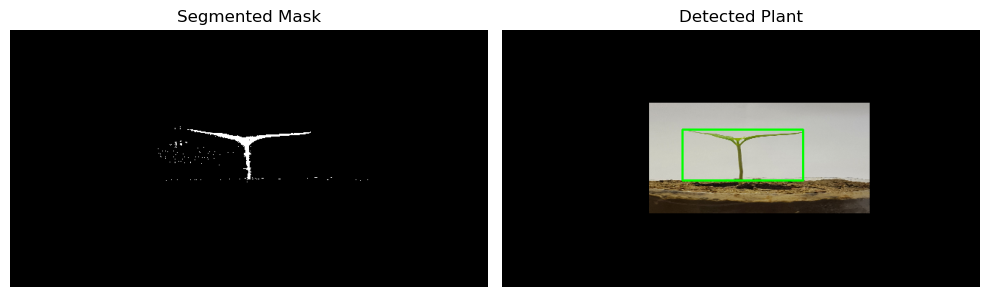

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('20250317_171356.jpg')
resized_image = cv2.resize(image, (650, 350))

# region of interest 
x_start, x_end = 200, 500
y_start, y_end = 100, 250

# Create a black background and copy ROI
black_background = np.zeros_like(resized_image)
black_background[y_start:y_end, x_start:x_end] = resized_image[y_start:y_end, x_start:x_end]

# convert to HSV
hsv = cv2.cvtColor(black_background, cv2.COLOR_BGR2HSV)

# previously tuned HSV values
lower_green = np.array([28, 16, 0])
upper_green = np.array([179, 255, 255])

# Create mask
mask = cv2.inRange(hsv, lower_green, upper_green)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    print("No plant detected. Plant Height = 0 pixels.")
else:
    # Get the largest contour
    plant_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(plant_contour)

    # Draw bounding box
    cv2.rectangle(black_background, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Output plant height
    print(f"Plant Height (in pixels): {h}")

    # Display results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Segmented Mask")
    plt.imshow(mask, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Detected Plant")
    plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
#day9

Plant Height (in pixels): 83


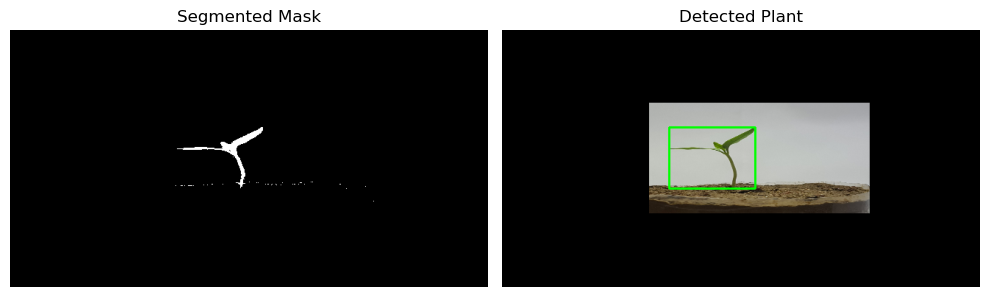

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize the new image
image = cv2.imread('20250316_192741.jpg')
resized_image = cv2.resize(image, (650, 350))

# Define region of interest (same coordinates as before)
x_start, x_end = 200, 500
y_start, y_end = 100, 250

# Create a black background and copy ROI
black_background = np.zeros_like(resized_image)
black_background[y_start:y_end, x_start:x_end] = resized_image[y_start:y_end, x_start:x_end]

# Convert to HSV
hsv = cv2.cvtColor(black_background, cv2.COLOR_BGR2HSV)

# Use previously tuned HSV values
lower_green = np.array([28, 16, 0])
upper_green = np.array([179, 255, 255])

# Create mask
mask = cv2.inRange(hsv, lower_green, upper_green)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    print("No plant detected. Plant Height = 0 pixels.")
else:
    # Get the largest contour
    plant_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(plant_contour)

    # Draw bounding box
    cv2.rectangle(black_background, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Output plant height
    print(f"Plant Height (in pixels): {h}")

    # Display results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Segmented Mask")
    plt.imshow(mask, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Detected Plant")
    plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
#day08

Plant Height (in pixels): 54


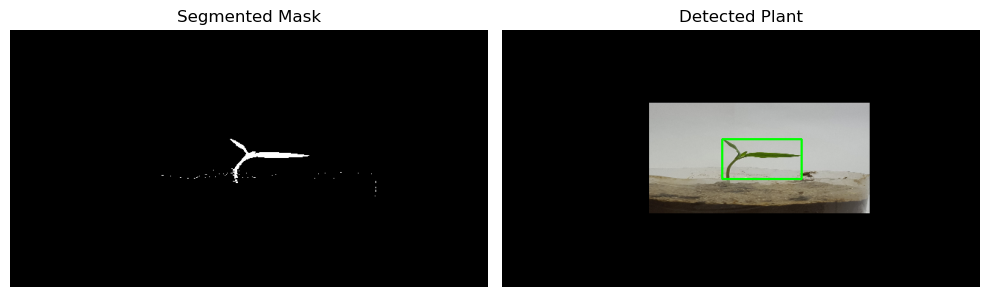

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize the new image
image = cv2.imread('20250315_184202.jpg')
resized_image = cv2.resize(image, (650, 350))

# Define region of interest (same coordinates as before)
x_start, x_end = 200, 500
y_start, y_end = 100, 250

# Create a black background and copy ROI
black_background = np.zeros_like(resized_image)
black_background[y_start:y_end, x_start:x_end] = resized_image[y_start:y_end, x_start:x_end]

# Convert to HSV
hsv = cv2.cvtColor(black_background, cv2.COLOR_BGR2HSV)

# Use previously tuned HSV values
lower_green = np.array([28, 16, 0])
upper_green = np.array([179, 255, 255])

# Create mask
mask = cv2.inRange(hsv, lower_green, upper_green)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    print("No plant detected. Plant Height = 0 pixels.")
else:
    # Get the largest contour
    plant_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(plant_contour)

    # Draw bounding box
    cv2.rectangle(black_background, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Output plant height
    print(f"Plant Height (in pixels): {h}")

    # Display results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Segmented Mask")
    plt.imshow(mask, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Detected Plant")
    plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
#day07

Plant Height (in pixels): 60


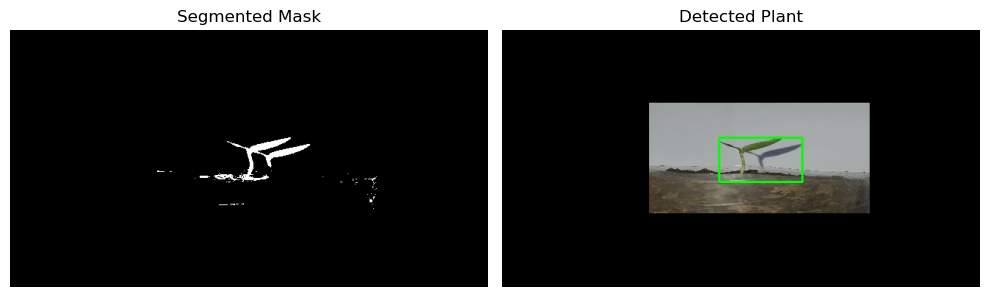

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize the new image
image = cv2.imread('20250314_082104.jpg')
resized_image = cv2.resize(image, (650, 350))

# Define region of interest (same coordinates as before)
x_start, x_end = 200, 500
y_start, y_end = 100, 250

# Create a black background and copy ROI
black_background = np.zeros_like(resized_image)
black_background[y_start:y_end, x_start:x_end] = resized_image[y_start:y_end, x_start:x_end]

# Convert to HSV
hsv = cv2.cvtColor(black_background, cv2.COLOR_BGR2HSV)

# Use previously tuned HSV values
lower_green = np.array([28, 16, 0])
upper_green = np.array([179, 255, 255])

# Create mask
mask = cv2.inRange(hsv, lower_green, upper_green)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    print("No plant detected. Plant Height = 0 pixels.")
else:
    # Get the largest contour
    plant_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(plant_contour)

    # Draw bounding box
    cv2.rectangle(black_background, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Output plant height
    print(f"Plant Height (in pixels): {h}")

    # Display results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Segmented Mask")
    plt.imshow(mask, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Detected Plant")
    plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
#day06

Plant Height (in pixels): 60


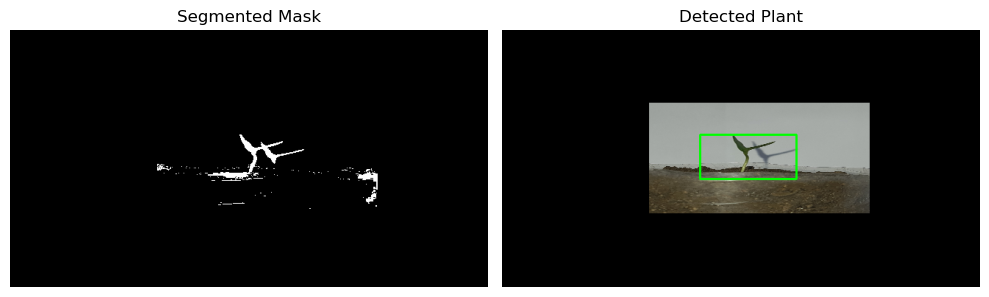

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize the new image
image = cv2.imread('20250313_193623.jpg')
resized_image = cv2.resize(image, (650, 350))

# Define region of interest (same coordinates as before)
x_start, x_end = 200, 500
y_start, y_end = 100, 250

# Create a black background and copy ROI
black_background = np.zeros_like(resized_image)
black_background[y_start:y_end, x_start:x_end] = resized_image[y_start:y_end, x_start:x_end]

# Convert to HSV
hsv = cv2.cvtColor(black_background, cv2.COLOR_BGR2HSV)

# Use previously tuned HSV values
lower_green = np.array([28, 16, 0])
upper_green = np.array([179, 255, 255])

# Create mask
mask = cv2.inRange(hsv, lower_green, upper_green)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    print("No plant detected. Plant Height = 0 pixels.")
else:
    # Get the largest contour
    plant_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(plant_contour)

    # Draw bounding box
    cv2.rectangle(black_background, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Output plant height
    print(f"Plant Height (in pixels): {h}")

    # Display results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Segmented Mask")
    plt.imshow(mask, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Detected Plant")
    plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
#day05

Plant Height (in pixels): 25


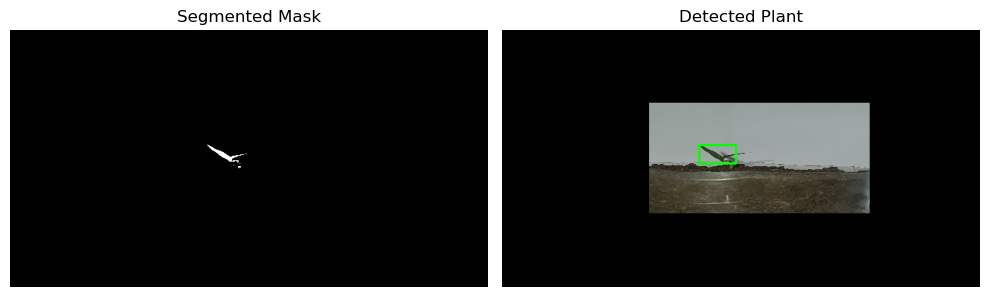

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize the new image
image = cv2.imread('20250312_174709.jpg')
resized_image = cv2.resize(image, (650, 350))

# Define region of interest (same coordinates as before)
x_start, x_end = 200, 500
y_start, y_end = 100, 250

# Create a black background and copy ROI
black_background = np.zeros_like(resized_image)
black_background[y_start:y_end, x_start:x_end] = resized_image[y_start:y_end, x_start:x_end]

# Convert to HSV
hsv = cv2.cvtColor(black_background, cv2.COLOR_BGR2HSV)

# Use previously tuned HSV values
lower_green = np.array([37, 72, 12])
upper_green = np.array([179, 255, 255])

# Create mask
mask = cv2.inRange(hsv, lower_green, upper_green)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    print("No plant detected. Plant Height = 0 pixels.")
else:
    # Get the largest contour
    plant_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(plant_contour)

    # Draw bounding box
    cv2.rectangle(black_background, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Output plant height
    print(f"Plant Height (in pixels): {h}")

    # Display results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Segmented Mask")
    plt.imshow(mask, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Detected Plant")
    plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
#day04

Plant Height (in pixels): 9


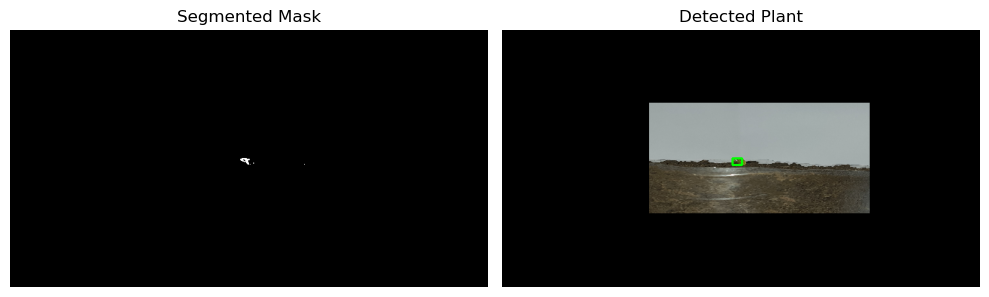

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and resize the new image
image = cv2.imread('20250311_074149.jpg')
resized_image = cv2.resize(image, (650, 350))

# Define region of interest (same coordinates as before)
x_start, x_end = 200, 500
y_start, y_end = 100, 250

# Create a black background and copy ROI
black_background = np.zeros_like(resized_image)
black_background[y_start:y_end, x_start:x_end] = resized_image[y_start:y_end, x_start:x_end]

# Convert to HSV
hsv = cv2.cvtColor(black_background, cv2.COLOR_BGR2HSV)

# Use previously tuned HSV values
lower_green = np.array([33, 61, 48])
upper_green = np.array([179, 255, 255])

# Create mask
mask = cv2.inRange(hsv, lower_green, upper_green)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    print("No plant detected. Plant Height = 0 pixels.")
else:
    # Get the largest contour
    plant_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(plant_contour)

    # Draw bounding box
    cv2.rectangle(black_background, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Output plant height
    print(f"Plant Height (in pixels): {h}")

    # Display results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Segmented Mask")
    plt.imshow(mask, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Detected Plant")
    plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
# day10 -> 4cm

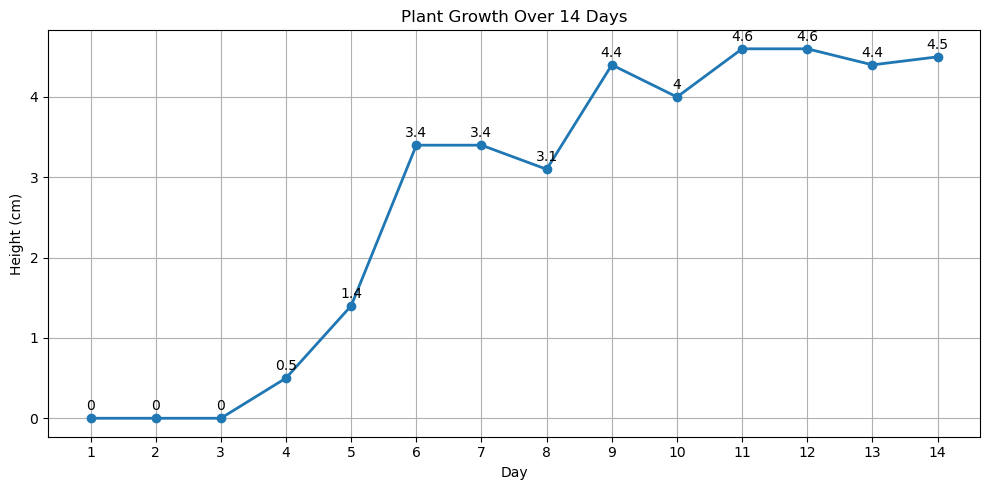

In [3]:
import matplotlib.pyplot as plt

# Day and height data from the table
days = list(range(1, 15))
heights = [0, 0, 0, 0.5, 1.4, 3.4, 3.4, 3.1, 4.4, 4, 4.6, 4.6, 4.4, 4.5]

# Plot the growth chart
plt.figure(figsize=(10, 5))
plt.plot(days, heights, marker='o', linestyle='-', linewidth=2)

# Labels and title
plt.title("Plant Growth Over 14 Days")
plt.xlabel("Day")
plt.ylabel("Height (cm)")
plt.xticks(days)
plt.grid(True)

# Annotate points
for day, height in zip(days, heights):
    plt.text(day, height + 0.1, str(height), ha='center')

plt.tight_layout()
plt.show()
